# **Problem Statement:** Breast Cancer Survival Prediction

## **Description:**
* **Breast cancer is a type of cancer that starts in the breast. It is the most common cancer in women, after skin cancer. Breast cancer can occur in men, but it is much less common.**
* **Breast cancer starts when cells in the breast grow out of control. These cells form a tumor. The tumor can be either benign or malignant. Benign tumors are not cancerous. Malignant tumors are cancerous.**
* **Malignant breast tumors can spread to other parts of the body, such as the bones, liver, and lungs. This is called metastasis.**

# 1. Importing Libraries

In [24]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import warnings

warnings.filterwarnings("ignore")

# 2. Dataset Information

In [4]:
data=pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/BRCA.csv")
data.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


## Datasets:
* **We have a dataset of over 400 breast cancer patients who underwent surgery for the treatment of breast cancer. Below is the information of all columns in the dataset:**

* **Patient_ID:** ID of the patient
* **Age:** Age of the patient
* **Gender:** Gender of the patient
Protein1, Protein2, Protein3, Protein4: expression levels
* **Tumor_Stage**: Breast cancer stage of the patient
* **Histology:** Infiltrating Ductal Carcinoma, Infiltration Lobular Carcinoma, Mucinous Carcinoma
* **ER status:** Positive/Negative
* **PR status:** Positive/Negative
* **HER2 status:** Positive/Negative
* **Surgery_type:** Lumpectomy, Simple Mastectomy, Modified Radical Mastectomy, Other
* **DateofSurgery:** The date of Surgery
* **DateofLast_Visit:** The date of the last visit of the patient
* **Patient_Status:** Alive/Dead

## Sort Summary Of Datasets

* **Age:** The patient's age at diagnosis is an important risk factor for breast and ovarian cancer. The risk of developing breast cancer increases with age, and the risk of developing ovarian cancer increases even more with age.
* **Gender:** Women are more likely to develop breast and ovarian cancer than men. This is because women have two copies of the BRCA1 and BRCA2 genes, while men only have one copy.
* **Race:** African American women are more likely to develop breast cancer than white women. This is thought to be due to a combination of genetic and environmental factors.
* **Ethnicity:** Hispanic women are more likely to develop ovarian cancer than non-Hispanic white women. This is thought to be due to a combination of genetic and environmental factors.
* **Family history:** Women with a family history of breast or ovarian cancer are at an increased risk of developing the disease themselves. This is because they are more likely to inherit a mutation in the BRCA1 or BRCA2 genes.
* **Tumor size:** The size of the tumor at diagnosis is an important factor in predicting the patient's prognosis. Larger tumors are more likely to be aggressive and to spread to other parts of the body.
* **Tumor grade:** The grade of the tumor is a measure of how abnormal the cells look under a microscope. Higher-grade tumors are more likely to be aggressive and to spread to other parts of the body.
* **Stage:** The stage of the cancer at diagnosis is a measure of how far the cancer has spread. Early-stage cancers are more likely to be cured than late-stage cancers.
* **HER2 status:** The HER2 status of the tumor is a measure of whether the tumor cells have too much of the * **HER2 protein. HER2-positive tumors are more likely to be aggressive and to spread to other parts of the body.
* **Treatment:** The treatment that the patient receives will depend on the stage of the cancer, the tumor grade, and the HER2 status. Treatment options include surgery, radiation therapy, chemotherapy, and hormone therapy.
* **Survival status:** Whether the patient is alive or dead is an important measure of the effectiveness of treatment. Patients with early-stage cancer who receive treatment have a good chance of survival. Patients with late-stage cancer who receive treatment may still have a chance of survival, but the chances are lower.

# 3. Handling Null Value

In [5]:
data.isnull()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
337,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
338,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
339,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


* **Let’s have a look at whether the columns of this dataset contains any null values or not:**

In [6]:
data.isnull().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

* **So this dataset has some null values in each column, I will drop these null values:**

In [7]:
data = data.dropna()

In [8]:
data.isnull().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

# 4. Data Exploration

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float

* **Breast cancer is mostly found in females, so let’s have a look at the Gender column to see how many females and males are there:**

In [10]:
data.Gender.value_counts()

FEMALE    313
MALE        4
Name: Gender, dtype: int64

* **As expected, the proportion of females is more than males in the gender column. Now let’s have a look at the stage of tumour of the patients:**

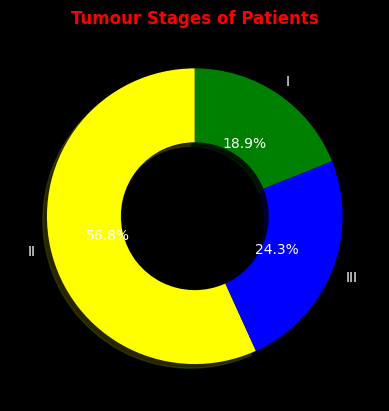

In [11]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
# Get the data
stage = data["Tumour_Stage"].value_counts()
transactions = stage.index
quantity = stage.values

# Create the pie chart
plt.pie(quantity, labels=transactions, autopct="%1.1f%%", shadow=True, 
        startangle=90,wedgeprops={"width": 0.5},colors=[ "yellow", "blue",'green'])

# Add a title
plt.title("Tumour Stages of Patients",weight='bold',color='red')

# Show the plot
plt.show()

* **Stage 1**
* **Stage 2**
* **Stage 3**
* **So most of the patients are in the second stage. Now let’s have a look at the histology of breast cancer patients. (Histology is a description of a tumour based on how abnormal the cancer cells and tissue look under a microscope and how quickly cancer can grow and spread):**

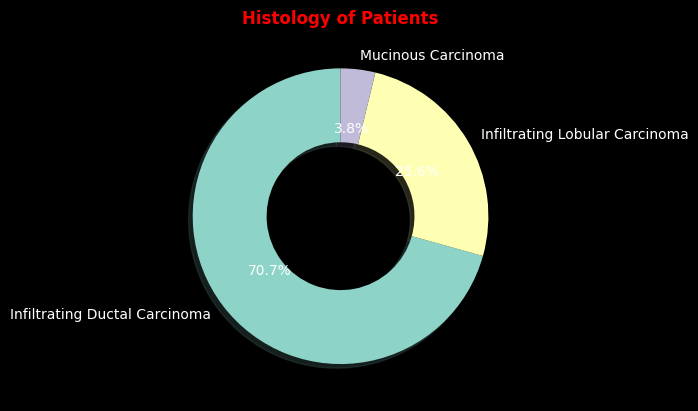

In [18]:
# Get the data
histology = data["Histology"].value_counts()
transactions = histology.index
quantity = histology.values

# Create the pie chart
plt.pie(quantity, labels=transactions, autopct="%1.1f%%", shadow=True, startangle=90, wedgeprops={"width": 0.5})

# Add a title
plt.title("Histology of Patients",weight='bold',color='red')

# Show the plot
plt.show()

* **Now let’s have a look at the values of ER status, PR status, and HER2 status of the patients:**

Breast cancer cells may have one, both, or none of these receptors.

* **ER-positive:** Breast cancers that have estrogen receptors are called ER-positive (or ER+) cancers.
* **PR-positive:** Breast cancers with progesterone receptors are called PR-positive (or PR+) cancers.
* **Hormone receptor-positive:** If the cancer cell has one or both of the receptors above, the term hormone-receptive positive (also called hormone-positive or HR+) breast cancer may be used.
* **Hormone receptor-negative:** If the cancer cell does not have the estrogen or the progesterone receptor, it's called hormone-receptor negative (also called hormone-negative or HR-).

In [13]:
# ER status
print(data["ER status"].value_counts())
# PR status
print(data["PR status"].value_counts())
# HER2 status
print(data["HER2 status"].value_counts())

Positive    317
Name: ER status, dtype: int64
Positive    317
Name: PR status, dtype: int64
Negative    288
Positive     29
Name: HER2 status, dtype: int64


* **Now let’s have a look at the type of surgeries done to the patients:**

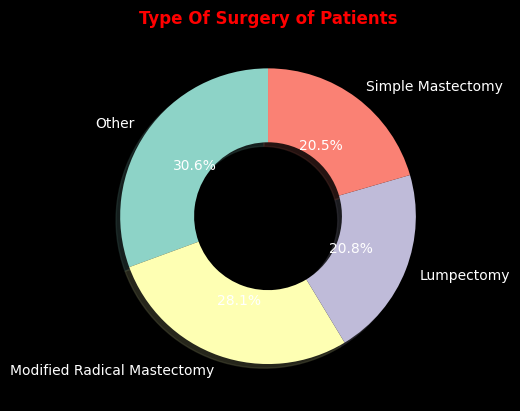

In [19]:
surgery = data["Surgery_type"].value_counts()
transactions = surgery.index
quantity = surgery.values

# Create the pie chart
plt.pie(quantity, labels=transactions, autopct="%1.1f%%", shadow=True, startangle=90, wedgeprops={"width": 0.5})

# Add a title
plt.title("Type Of Surgery of Patients",weight='bold',color='red')

# Show the plot
plt.show()

# 5. Data Encoding

In [20]:
data["Tumour_Stage"] = data["Tumour_Stage"].map({"I": 1, "II": 2, "III": 3})
data["Histology"] = data["Histology"].map({"Infiltrating Ductal Carcinoma": 1, 
                                           "Infiltrating Lobular Carcinoma": 2, "Mucinous Carcinoma": 3})
data["ER status"] = data["ER status"].map({"Positive": 1})
data["PR status"] = data["PR status"].map({"Positive": 1})
data["HER2 status"] = data["HER2 status"].map({"Positive": 1, "Negative": 2})
data["Gender"] = data["Gender"].map({"MALE": 0, "FEMALE": 1})
data["Surgery_type"] = data["Surgery_type"].map({"Other": 1, "Modified Radical Mastectomy": 2, 
                                                 "Lumpectomy": 3, "Simple Mastectomy": 4})
print(data.head())

     Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
0  TCGA-D8-A1XD  36.0       1  0.080353   0.42638   0.54715  0.273680   
1  TCGA-EW-A1OX  43.0       1 -0.420320   0.57807   0.61447 -0.031505   
2  TCGA-A8-A079  69.0       1  0.213980   1.31140  -0.32747 -0.234260   
3  TCGA-D8-A1XR  56.0       1  0.345090  -0.21147  -0.19304  0.124270   
4  TCGA-BH-A0BF  56.0       1  0.221550   1.90680   0.52045 -0.311990   

   Tumour_Stage  Histology  ER status  PR status  HER2 status  Surgery_type  \
0             3          1          1          1            2             2   
1             2          3          1          1            2             3   
2             3          1          1          1            2             1   
3             2          1          1          1            2             2   
4             2          1          1          1            2             1   

  Date_of_Surgery Date_of_Last_Visit Patient_Status  
0       15-Jan-17          19-Ju

# 7. Model Training

* **Before training the model, we need to split the data into training and test set:**

In [21]:
# Splitting data
x = np.array(data[['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 
                   'Tumour_Stage', 'Histology', 'ER status', 'PR status', 
                   'HER2 status', 'Surgery_type']])
y = np.array(data[['Patient_Status']])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

* **Training Machine Learning Model**

In [25]:
model=SVC()
model.fit(x_train,y_train)

SVC()

# 8. Model Prediction

In [26]:
# features = [['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type']]
features = np.array([[36.0, 1, 0.080353, 0.42638, 0.54715, 0.273680, 3, 1, 1, 1, 2, 2,]])
print(model.predict(features))

['Alive']


In [51]:
# features = [['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type']]
features = np.array([[50.0, 1, -0.420320, 0.97807, 0.91447, -0.031505, 3, 3, 1, 1, 2, 3,]])
print(model.predict(features))

['Alive']


In [53]:
y_pred=model.predict(x_test)

y_pred

array(['Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive', 'Alive',
       'Alive', 'Alive', 'Alive', 'Alive'], dtype=object)

# 9. Model Accuracy

In [55]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[26,  0],
       [ 6,  0]])

In [56]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [57]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive +false_negative + true_negative)
Accuracy

0.8125

In [58]:
Precision = true_positive/(true_positive+false_positive)
Precision

1.0

In [59]:
 Recall = true_positive/(true_positive+false_negative)
Recall

0.8125

In [60]:
 F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.896551724137931

# **Thank You** 

# Reference
[Aman Kharwal (medium.com)](https://amankharwal.medium.com/)